# WALMART DATA ANALYSIS AND FORECASTING

The goal of this project is to employ a diverse range of data analysis methodologies, such as statistical 
modeling, machine learning algorithms, and data visualization, to explore the dataset's potential and uncover 
hidden patterns and trends.

## WALMART:
Walmart is a multinational retail corporation that operates in the United States. It was founded in 1962 by Sam Walton and is headquartered in Bentonville, Arkansas. Walmart is one of the world's largest corporations and retailers. 
Walmart operates a chain of: Hypermarkets, Discount department stores, Grocery stores, Supermarkets, Neighborhood markets.

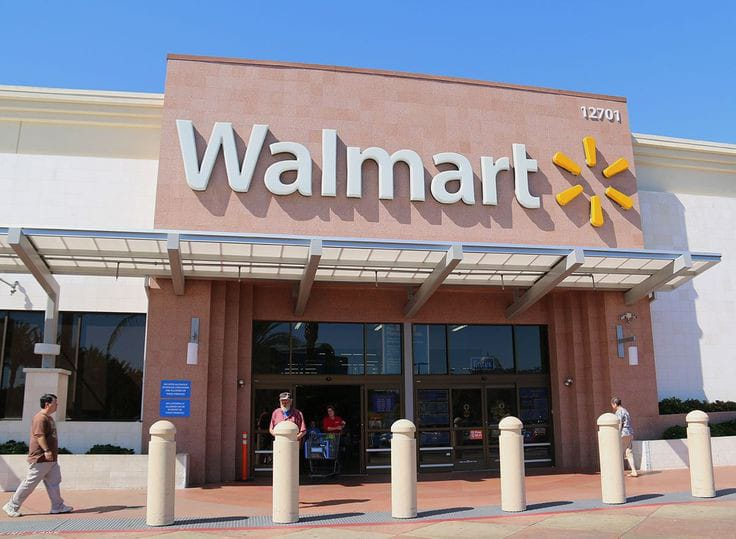

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('Walmart Data Analysis and Forcasting.csv')

##  Understanding the Dataset

In [4]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Initail 10 rows of the Walmart dataframe.

In [5]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


Last 10 rows of the Walmart dataframe

In [6]:
df.shape

(6435, 8)

It show that the dataframe have a total of 6435 rows and 8 columns

In [7]:
df["Store"].value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

There are total of 45 stores and the data of 143 weeks is given for each store

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

The name of the columns are given above

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


There are total 8 columns in which 5 columns are float type, 2 columns are int type and only one column is object type.And no null value is present in the entire dataframe. Memory usage by the dataframe is 402.3+ KB

In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No null value is present in the dataset.

In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


The above table describe count, mean, standard deviation, Minimum Value, Value below 25%, Value below 50%, value below 75% and Maximum values of all Integer type columns of the dataset.

In [12]:
df.duplicated().sum()

0

No duplicate(Repeated) values is present in the dataset.

# Cleaning the data

##  Converting the datatype of DATE column from object to datetime64   

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


The dada type of "Date" column is converted to datetime from object. Now Our dataset is suitable for further analysis

In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


#                                      VISUALIZATION OF DATA.

## CORELATION OF COLUMNS

In [16]:
df_new=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

In [17]:
df_new.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


The above dataset shows the relation of each column with all other columns.

->Weekly sale increases on decreasing the temperature.

->Weekly sale decreases on increasing CPI.

->CPI decreases on increasing Unemployment rate.


## -) Histogram for CPI (Concumer Price Index)

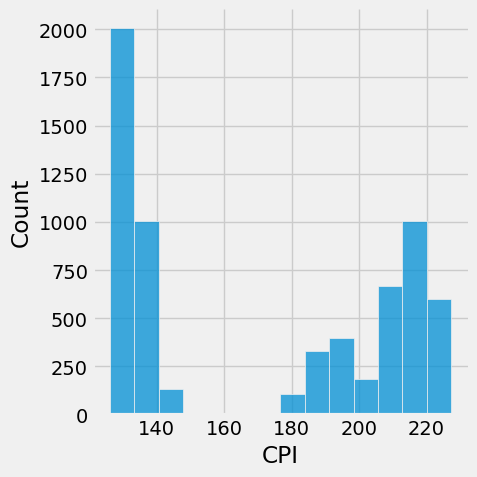

In [18]:
sns.displot(df['CPI'],kde=False)



For 2000 number of entries(Maximum among them) the CPI is lis between 120 to 130.

The value of CPI which is lies between 140 t0 150 and 175 to 185 is for minimum entries.

NO store have 0 cpi ever.

## -) HISTOGRAM for Weekly Sales 

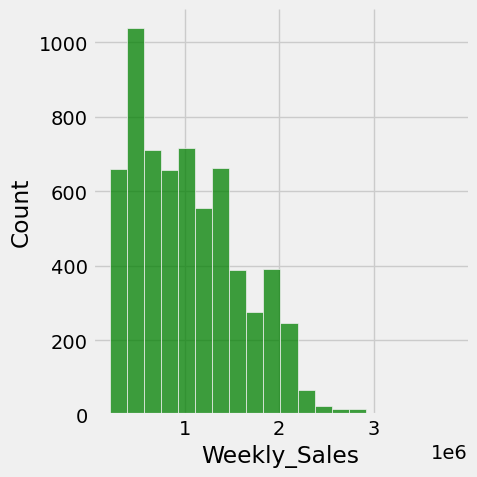

In [19]:
sns.displot(df['Weekly_Sales'],bins=20,color='g')

For 1100 number of weeks(Maximumm among them), Weekly Sales is lies from 250000 to 500000.

For least number of weeks, the weekly sales is about 2500000 to 2800000.

## -) WEEKLY SALES for different STORES during various WEEKS. (Cluster plot)

In [20]:
x = pd.pivot_table(index='Date',columns='Store',values='Weekly_Sales',aggfunc='sum',data=df)

In [21]:
x

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1746470.56,389813.02,2027620.23,310141.68,1369131.46,525545.76,884724.41,516361.06,1694862.41,...,270677.98,527953.14,398468.08,1495607.07,919595.44,1307928.01,505978.46,577792.32,355307.94,713173.95
2012-10-05,1670785.97,1998321.04,443557.65,2209835.43,343048.29,1518177.71,505830.56,976436.02,606755.30,1758971.38,...,277137.86,546122.37,458479.01,1574408.67,1069112.00,1400160.95,593162.53,642614.89,337390.44,733455.07
2012-10-12,1573072.81,1900745.13,410804.39,2133026.07,325345.41,1459396.84,503463.93,927511.99,558464.80,1713889.11,...,300236.85,521810.75,437320.66,1494417.07,982523.26,1409544.97,612379.90,619369.72,337796.13,734464.36


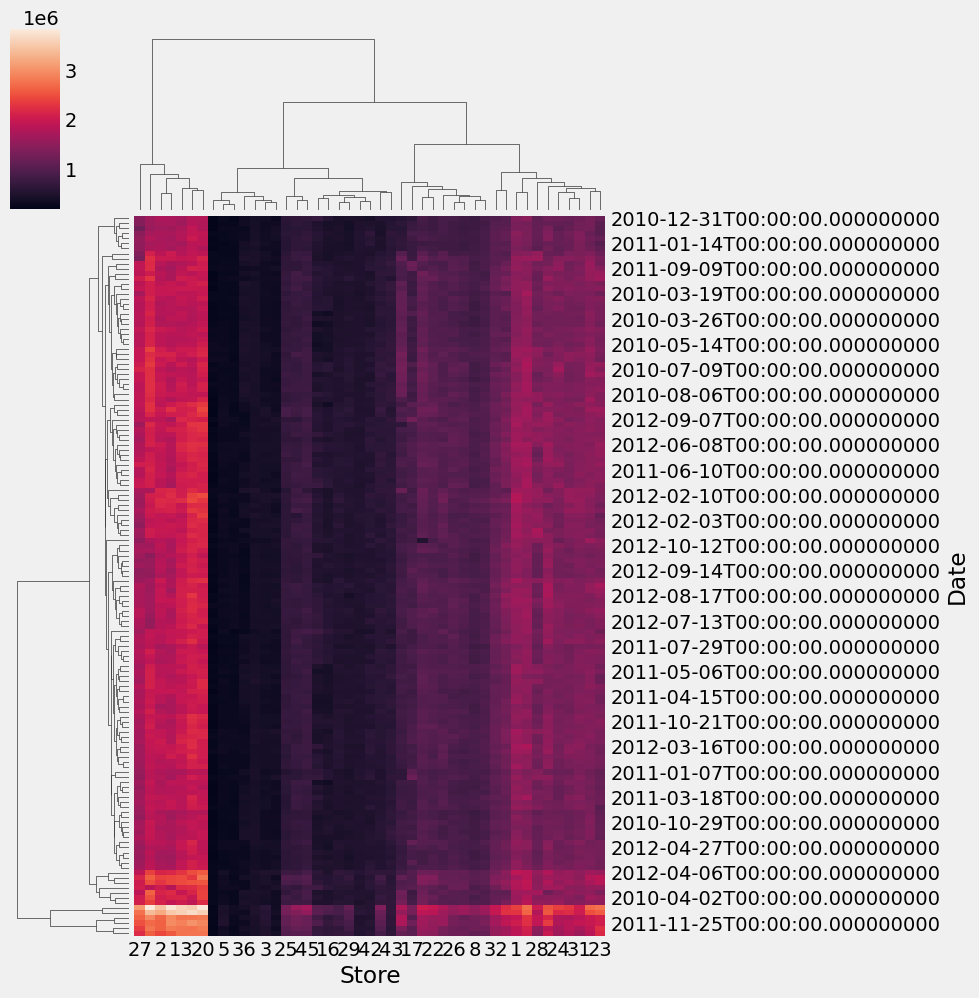

In [22]:
sns.clustermap(x)

stores 27,2,13,20 etc has the maximum weekly sales among all... whereas stores 3,5,36 has the minimum weekly sales.

## -) UNEMPLOYMENT RATE in different STORES during various WEEKS. (Heatmap)

In [23]:
y = pd.pivot_table(index='Date',columns='Store',values='Unemployment',aggfunc='sum',data=df)

<Axes: xlabel='Store', ylabel='Date'>

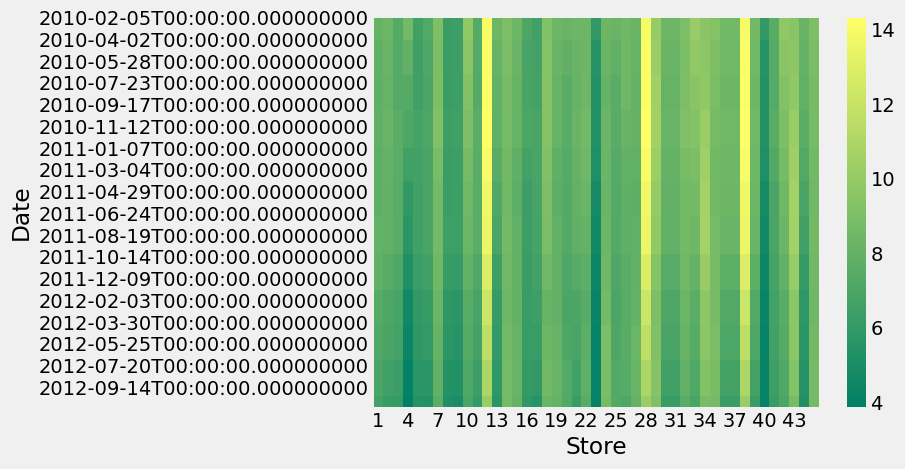

In [24]:
sns.heatmap(y,cmap='summer')

unemployment rate in store 4,23,40 and 44 is minimum and is maximum in store 12,28,38.

##  -) WEEKLY SALE in holiday weeks and non-holiday weeks. (Box Plot)

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

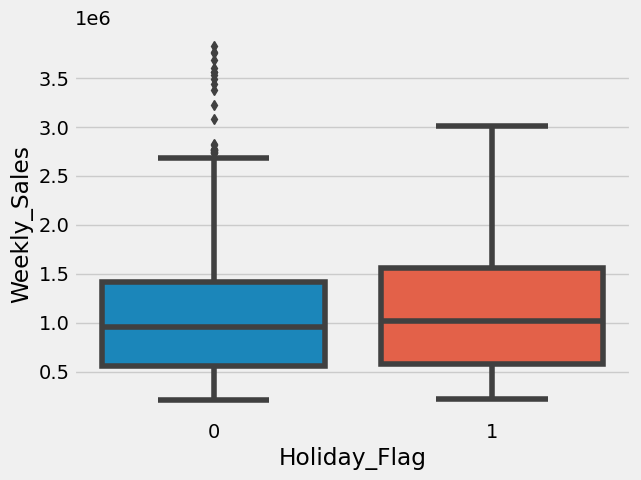

In [25]:
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)

The weekly_sales in holiday weeks is a bit more than the working days(non-holiday weeks). And it is obvious people prefer shopping during holidays.
But the outliers are more during the non-holiday weeks

## -) Change in CPI in differnt YEARS for different STORES (Clustermap)

In [26]:
z = pd.pivot_table(index='Date',columns='Store',values='CPI',aggfunc='sum',data=df)

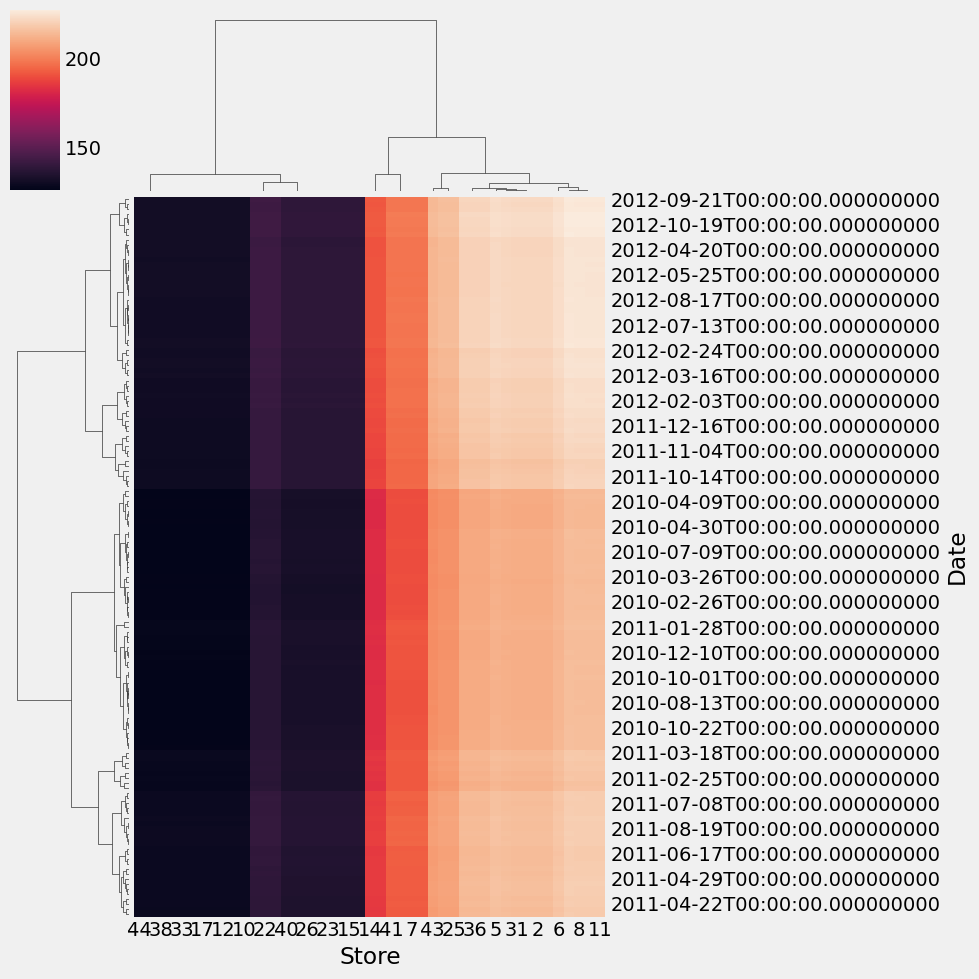

In [27]:
sns.clustermap(z)

  stores 14,41,7,43,25,36,5,31,2,6,8,11..etc(As shown in the above clusterplot) has the has the heighest CPI(Consumer Price Index) and basically it is maximum in year 2012 and minimum  in year 2010.

  stores 44,38,33,17,12,10,22,40,26,23,15...etc(As shown) has the lowest CPI as compare to other stores. 

-> In both the  above cases the CPI gradually increases from 2010 to 2012.

## -) Bivariate Analysis of Unemployment rate and Weekly Sales

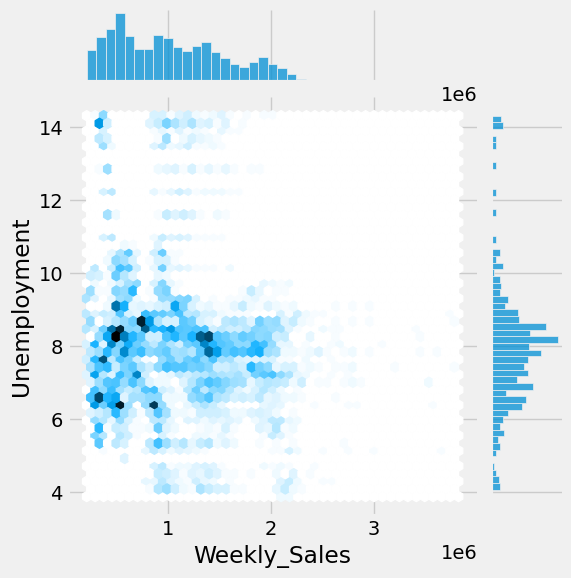

In [29]:
sns.jointplot(x='Weekly_Sales',y='Unemployment',kind='hex',data=df)

The heigher rate of UNEMPLOYMENT is lies between 6 to 10 which varry with the weekly sales upto 2500000 and the maximum unemployment rate is 8.

In most of the cases WEEKLY SALES is lies upto 2000000.

The histogram for individual variable i.e, Unemployment rate and weekly sales is shown...
It shows that the maximum range of weekly sales is from 0.5*1e6 (5000000) to 1.5*1e6(1500000).And the maximum rate of unemployment is lies between 7.5 to 8.5




# ANALYSIS

## -) Top three stores having the maximum overall sale(Sum of all weekly_sales) during three years.

In [30]:
df.groupby('Store').sum('Weekly_Sales').sort_values('Weekly_Sales',ascending=False)['Weekly_Sales'].head(3)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
Name: Weekly_Sales, dtype: float64

Analysis- Store-20 has the maximum overall sale during 3 years (i.e, sum of weekly sales for all three years is maximum for store 33).
Store 4 has second heighest maximum overall sale, and store 14 has third heighest maximum overall sale.

## -) Average weekly sales of each store in every year.

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

In [32]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [33]:
df.pivot_table(index='Store',columns='year',values='Weekly_Sales',aggfunc='mean')

year,2010,2011,2012
Store,,,
1,1.526642e+06,1.556191e+06,1.586094e+06
2,1.984956e+06,1.896305e+06,1.895272e+06
3,3.905296e+05,4.003245e+05,4.191730e+05
4,1.993343e+06,2.136390e+06,2.157470e+06
5,3.090840e+05,3.167465e+05,3.295079e+05
6,1.602340e+06,1.548630e+06,1.542210e+06
7,5.326683e+05,5.896662e+05,5.899432e+05
8,9.000932e+05,9.137074e+05,9.124167e+05
9,5.235254e+05,5.516533e+05,5.575356e+05


The above table (Pivot table) contains the data of all sotres as their average weekly sales for every year.

## -) Which Store has the least overall sale (total sale within the year) in 2010,2011 and 2012 ?

In [34]:
df.groupby(['year', 'Store']).sum('Weekly_Sales').sort_values('Weekly_Sales').head()

,,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
year,Store,,,,,,
2012,33,11435551.03,2,3400.57,171.405,5625.159924,315.478
2010,33,12766834.26,4,3670.87,145.862,6066.353364,462.102
2011,33,12957836.67,4,3900.69,194.090,6709.679444,442.661
2012,36,13286470.53,2,3166.08,153.239,9474.541246,296.040
2010,44,13607519.45,4,2562.42,135.880,6066.353364,376.580


Analysis-) Store 33 has the least overall sale in 2010, 2011 and 2012 (The sum of all weekly sales for 2010, 2011 and 2012 respectively are minimum).

Conclusion-)This shows that store 33 is the most unsucessful retail store of Walmart.

         

## -) Weeks having the heighest weekly sales (for each store).

In [35]:
grouped = df.groupby('Store')

# Sort each group by the 'Temperature' column in descending order
sorted_df = grouped.apply(lambda x: x.sort_values('Weekly_Sales', ascending=False))

In [36]:
sorted_df.drop_duplicates(subset=['Store'])[['Weekly_Sales','Date']].rename(columns={'Weekly_Sales':'maximum_Weekly_Sales'})

,,maximum_Weekly_Sales,Date
Store,,,
1,46,2387950.20,2010-12-24
2,189,3436007.68,2010-12-24
3,332,605990.41,2010-12-24
4,527,3676388.98,2011-12-23
5,666,507900.07,2011-11-25
6,761,2727575.18,2010-12-24
7,956,1059715.27,2011-12-23
8,1047,1511641.09,2010-12-24
9,1242,905324.68,2011-12-23


Analysis-) I have generated a virtual table having columns maximum_Weekly_sales and Date. This table shows the maximum weekly sale of each store with its particular Date(Week).

## -) How many holiday weeks are there for each store.


In [37]:
mask=df['Holiday_Flag']==1
df_2=df[mask]


In [38]:
df_2.groupby('Store').size()

Store
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
dtype: int64

Analysis-) All Store has exactly 10 number of total holiday weeks in three years.

## -) What is the Average unemployment rate for each year.

In [39]:
df.groupby('year').mean('Unemployment')['Unemployment']

year
2010    8.492714
2011    8.082036
2012    7.347964
Name: Unemployment, dtype: float64

Analysis-) Average Unemployment rate is gradually decreases from 2010 to 2012 i.e, from 8.49 to 7.34

##  -) Which store has the maximum of Average CPI for each year?


In [40]:
df.groupby(['year','Store']).mean('CPI').sort_values('CPI',ascending=False)['CPI'].head(55)


year  Store
2012  9        225.407885
      8        225.213876
      3        225.164774
      11       225.164774
      6        223.264275
      5        222.243262
      1        221.655342
      21       221.292905
      2        221.292905
      31       221.292905
      30       221.292905
      39       220.338169
      37       220.338169
      36       220.338169
2011  9        219.257038
      8        219.070452
      3        219.023229
      11       219.023229
      6        217.195441
      5        216.213491
      1        215.648064
      30       215.299494
      21       215.299494
      2        215.299494
      31       215.299494
2010  9        214.848157
      8        214.665013
      11       214.618661
      3        214.618661
2012  20       214.455700
      25       214.455700
2011  36       214.389490
      37       214.389490
      39       214.389490
2012  43       213.073682
2010  6        212.824592
      5        211.860756
      1        211.305760


Analysis-)

1-) In 2010, Store 9 has the maximum Average CPI(means maximum CPI among the Average CPI's of all sotres) and its value is 214.848157 . Store 8 is at the second position with the average CPI of 214.665013 and then Store 11.

2-) In 2011, Store 9 has the maximum Average CPI and its value is 219.257038 . Store 8 is at the second position with the average CPI of 219.070452 and then store 3.

3-) In 2012, Store 9 has the maximum Average CPI and its value is 225.407885 . Store 8 is at the second position with the average CPI of 225.213876 and the store 3.

Conclusion-) The Average CPI of store 9 is heighest in all thee years, Higher CPI values indicate that, on average, prices for the basket of goods and services have increased, which can be an indication of inflation.

## -) What is the average fuel price during the holiday weeks and non-holiday weeks ?

In [41]:
df.groupby('Holiday_Flag').mean('Fuel_Price')['Fuel_Price']

Holiday_Flag
0    3.368467
1    3.227464
Name: Fuel_Price, dtype: float64

Analysis-) During Non holiday weeks the average fuel price is is 3.36 which is greater the the holiday weeks i.e, 3.22

## -) Which are the hotest and coldest day of the the 2010, 2011 and 2012

In [42]:
grouped2 = df.groupby('year')

# Sort each group by the 'Temperature' column in descending order
sorted_df2 = grouped2.apply(lambda x: x.sort_values('Temperature', ascending=False))

In [43]:
sorted_df2.drop_duplicates(subset=['year'])[['Date','Temperature','Weekly_Sales']]

,,Date,Temperature,Weekly_Sales
year,,,,
2010,4599,2010-07-16,100.14,280937.84
2011,4657,2011-08-26,99.66,237095.82
2012,4707,2012-08-10,100.07,297753.49


Analysis

-)The hotest day of 2010 is 16th july.whose temperature is 100.14

-)The hotest day of 2011 is 26th August.whose temperature is 99.66

-)The hostest day of 2012 is 10th August.whose temperature is 100.07. 

In [44]:
sorted_df2.drop_duplicates(subset=['year'],keep='last')[['Date','Temperature','Weekly_Sales']]

,,Date,Temperature,Weekly_Sales
year,,,,
2010,3575,2010-02-05,9.55,1034119.21
2011,910,2011-02-04,-2.06,558027.77
2012,959,2012-01-13,7.46,593875.46


Analysis

-)The coldest day of 2010 is 5th feb. whose temperature is 9.55

-)The coldest day of 2011 is 4th feb. whose temperature is -2.06k.

-)The coldest day of 2012 is 13th jan. whose temperature is 7.46k.


Note-) When the temperature is high(During hot days) weekly sales is lower and when the temperature is low(During cold days) weekly sales is heigher.

#  CONCLUSION

##  1-) Effect of holidays on weekly sales..
The observations clearly indicate that during 
holidays, the store experiences a notable increase in sales. This finding highlights the importance of 
accounting for the holiday factor when predicting weekly sales for any store in a similar domain. However, it 
is crucial to note that while holidays have a impact on sales, other factors may also influence the 
store's performance.

## 2-)Effect of temperature on weekly sales..
It is clearly visible from the dataset that the weekly sales decreases in summers (in hot daya). And the weekly sale increases in winters(In cold days).

## 3-) High contributing stores and low contributing stores..
Store 20,4 and 14 are the heighly contributing stores as their weekly sales is heighest.

Store 5,44 and 33 are the low contributing stores as their weekly sales is minimum.


# Model Building

In [45]:
# splitting the dataset for training and testing

y_train=df['Weekly_Sales']
X_train=df.drop(['Date','Weekly_Sales'],axis=1)
# df_test=df_test.drop(columns=['County','Province_State','ForecastId'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [46]:
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'year'],
      dtype='object')

In [47]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
4766,34,1,34.11,2.955,127.087677,10.210,2010
5764,41,0,33.90,2.728,190.974107,7.508,2010
3151,23,0,36.07,2.805,131.784000,5.892,2010
4880,35,0,68.90,2.809,136.287426,9.051,2010
2740,20,0,75.14,2.783,204.357166,7.527,2010


In [48]:
y_train.head()

4766     902109.69
5764    1434908.13
3151    1408082.96
4880    1160412.71
2740    2031852.16
Name: Weekly_Sales, dtype: float64

## Linear Regression

In [49]:
#Fitting Linear regression to the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = LinearRegression()

scores = []

pipeline = Pipeline([('scaler2' , StandardScaler()),
                        ('LinearRegressor:', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

scores.append(pipeline.score(X_test, y_test))

In [50]:
print(scores)

[0.16443293821568783]


## Random Forest

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=150)

model2.fit(X_train , y_train)
y_pred = model2.predict(X_test)
model2.score(X_test,y_test)

0.933303776514414

In [54]:
import pickle

In [55]:
pickle.dump(model2 , open('model2.pkl' , 'wb'))